# Processamento digital de imagens
Esse notebook tem o objetivo de implementar técnicas de alargamento de contraste e limiarização, conforme explicadas no livro texto do Gonzalez
- Notebook desenvolvido por: Marcos Vinicius Silva - 202204192
---

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Função para calcular histogramas (será utilizada para visualização)
def calcular_histograma(imagem):
    """Calcula o histograma de uma imagem."""
    histograma = np.zeros(256, dtype=int)
    altura, largura = imagem.shape[:2]
    for i in range(altura):
        for j in range(largura):
            nivel_pixel = imagem[i, j]
            histograma[nivel_pixel] += 1
    return histograma

# Imagem original
Primeiramente vamos olhar a imagem original, é fácil perceber que a imagem fornecida é de baixo contraste conforme o histograma a direita

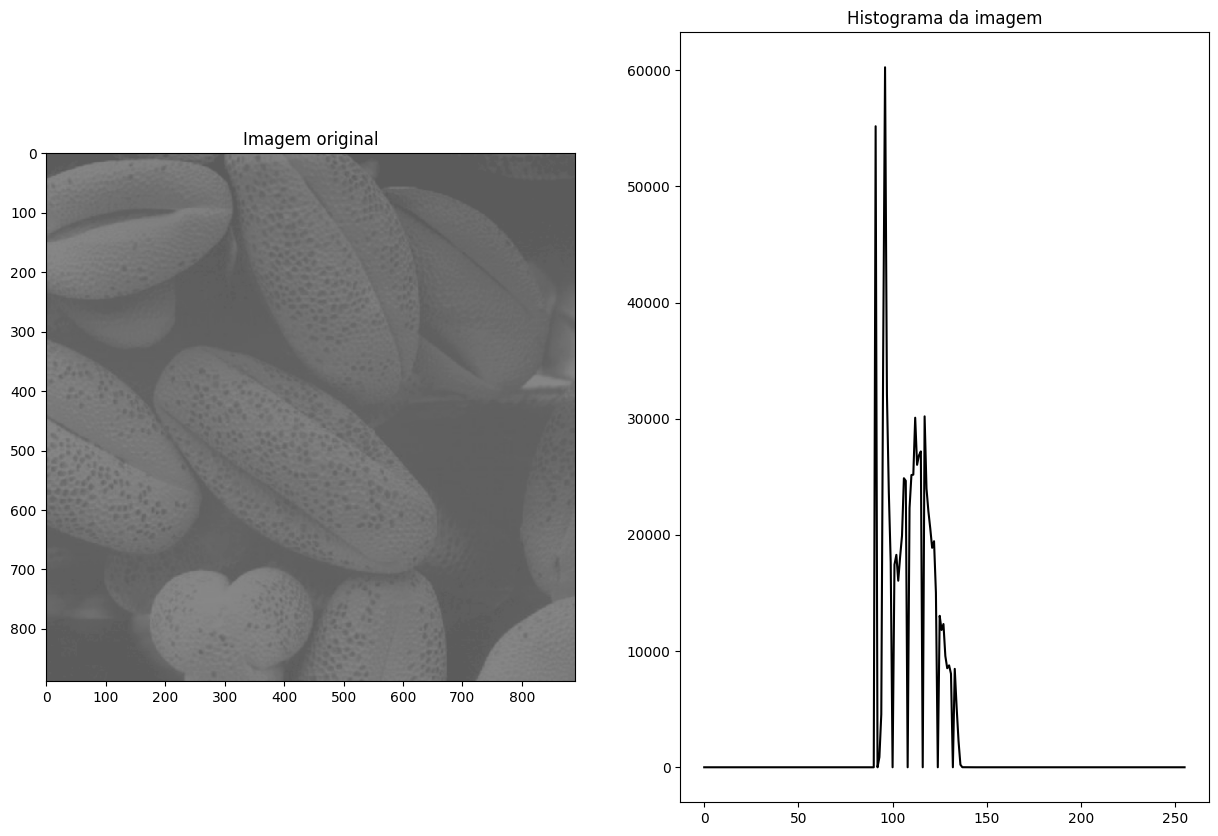

In [ ]:
# Ler a imagem exatamente como está no disco (sem alterações)
imagem_original = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif')
img = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif',cv2.IMREAD_GRAYSCALE)
hist = calcular_histograma(img)


f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].set_title('Imagem original')
ax[1].set_title('Histograma da imagem')

ax[0].imshow(imagem_original)
ax[1].plot(hist, color='k')


# Metodologia e implentação - Alargamento de contraste
é uma técnica de processamento de imagem usada para aumentar a diferença entre os tons mais claros e os mais escuros da imagem, realçando detalhes.
Tem o objetivo de **esticar** os níveis de intesidade da imagem para ocupar toda a faixa possível, melhorando o contraste.<br> Considerando I_min e I_max como as intensidades mínimas e máximas o novo valor de um pixel I(x,y) será:

$$I'(x,y) = \frac{I(x,y) - I_{\min}}{I_{\max} - I_{\min}} \cdot (L_{\max} - L_{\min}) + L_{\min}$$

- I min: Menor valor de intensidade da imagem original
-I max: Maior valor de intensidade da imagem original
-L min: Novo valor mínimo desejado
-L max: Novo valor máximo desejado



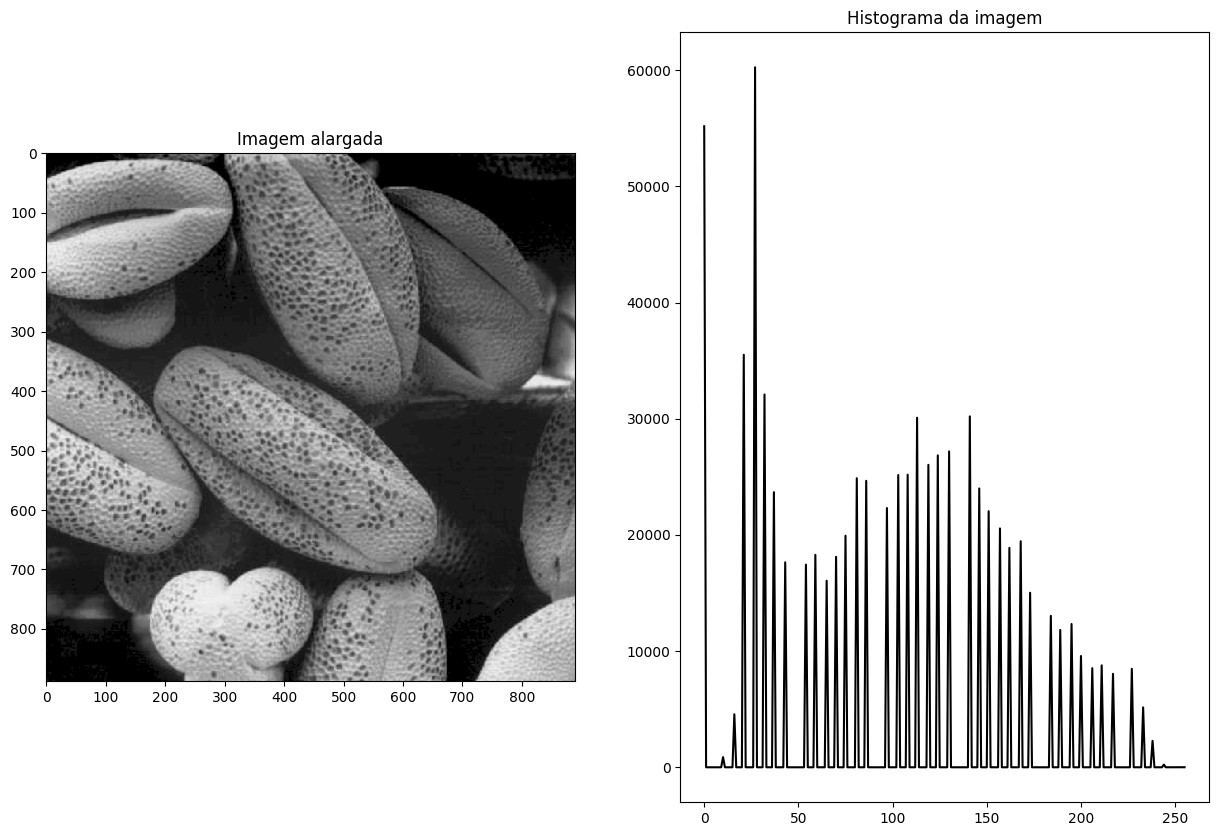

In [ ]:
#Dimensões da imagem
altura, largura = img.shape

# calcula mínimo e máximo de forma vetorizada
L_min = 0
L_max = 255
i_min = int(imagem_original.min())
i_max = int(imagem_original.max())

norm = ((imagem_original.astype(np.float32) - i_min) * (L_max-L_min) / (i_max - i_min)).astype(np.uint8)

# exibe a imagem normalizada
hist_norm = calcular_histograma(norm)
f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].set_title('Imagem alargada')
ax[1].set_title('Histograma da imagem')

ax[0].imshow(norm, cmap='gray')
ax[1].plot(hist_norm, color='k')



# Comparação entre as imagens

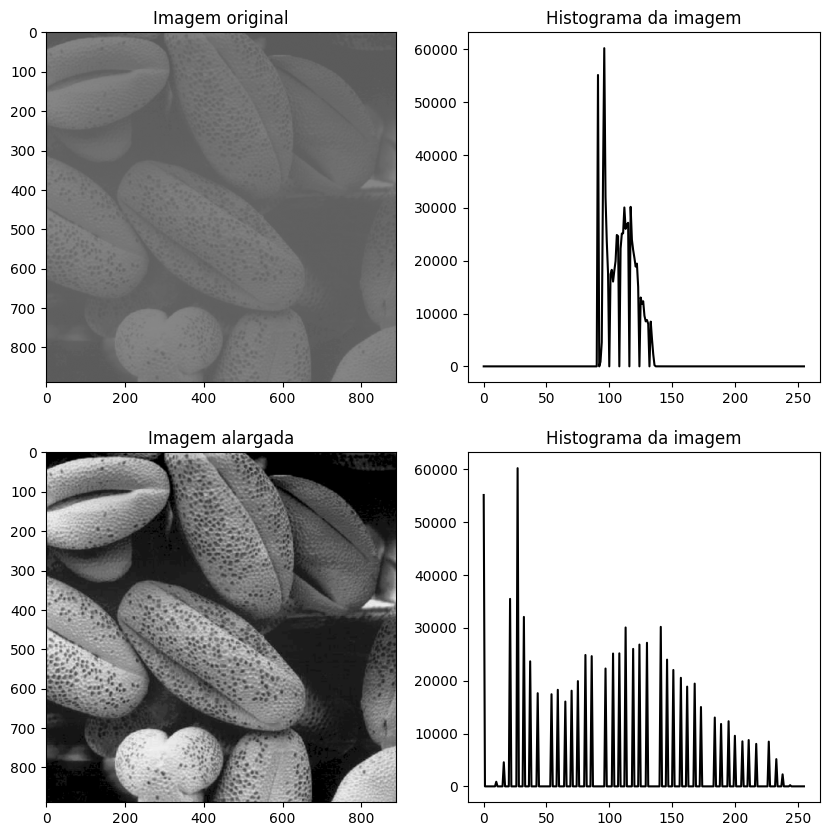

In [ ]:
f,ax = plt.subplots(2,2,figsize=(10,10))

ax[0][0].set_title('Imagem original')
ax[0][0].imshow(img, vmin=0, vmax=255, cmap='gray')
ax[0][1].set_title('Histograma da imagem')
ax[0][1].plot(hist, color='k')

ax[1][0].set_title('Imagem alargada')
ax[1][0].imshow(norm, vmin=0, vmax=255, cmap='gray')
ax[1][1].set_title('Histograma da imagem')
ax[1][1].plot(hist_norm, color='k')



# Limiarização
Limiarização é uma técnica de processamento de imagens utilizada para converter uma imagem em escala de cinza em uma imagem binária, ou seja, composta apenas por pixels pretos e brancos. O objetivo é destacar os elementos mais relevantes da imagem, como bordas, formas ou regiões de interesse, facilitando análises posteriores, como reconhecimento de objetos ou segmentação.
Seja \( f(x, y) \) a intensidade do pixel na posição \( (x, y) \), e \( T \) o valor de limiar. A imagem limiarizada \( g(x, y) \) é definida por:

\
\begin{cases}
255, & \text{se } f(x, y) > T \\
0, & \text{caso contrário}
\end{cases}



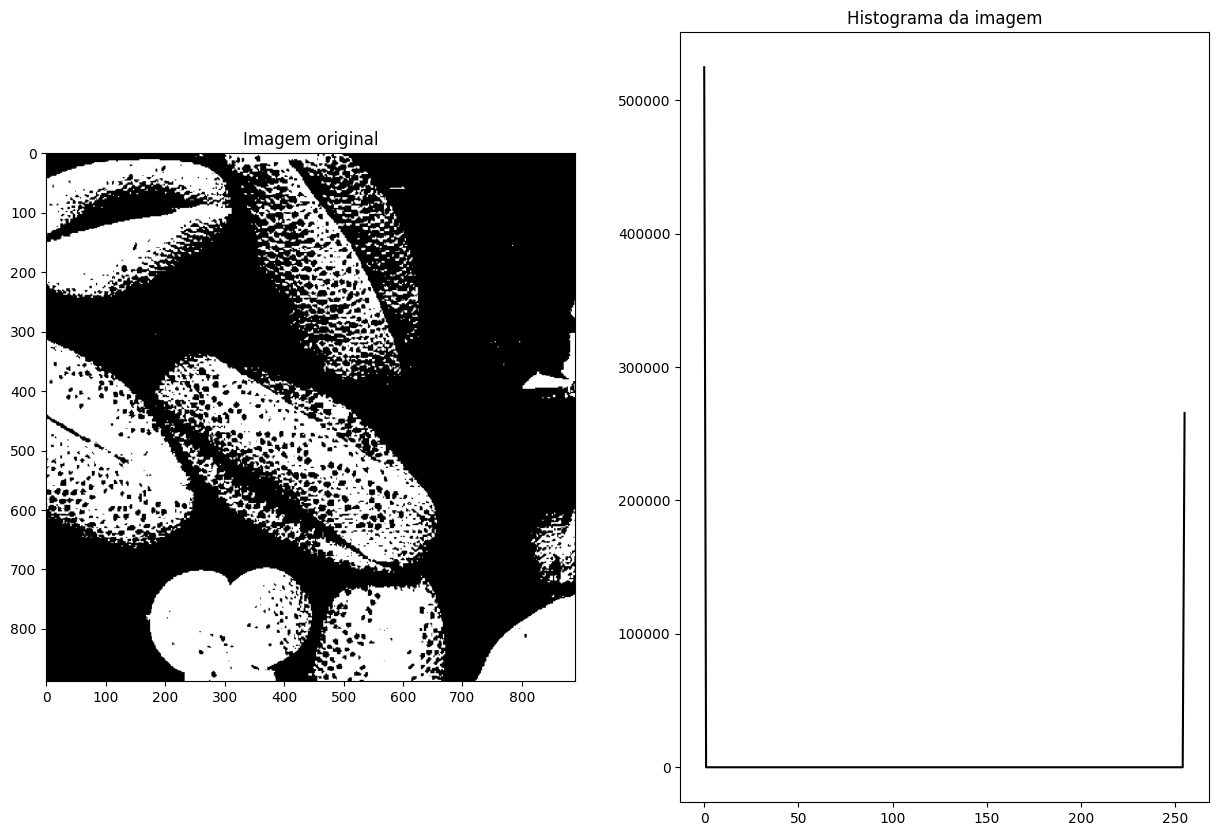

In [ ]:
def limiarizar_imagem(imagem, limiar):
  imagem_limiarizada = np.where(imagem > limiar, 255, 0).astype(np.uint8)
  return imagem_limiarizada

imagem_limiarizada = limiarizar_imagem(norm, 127)
hist_limiarizada = calcular_histograma(imagem_limiarizada)

f, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].set_title('Imagem original')
ax[1].set_title('Histograma da imagem')

ax[0].imshow(imagem_limiarizada)
ax[1].plot(hist_limiarizada, color='k')

# Comparação de todas imagens


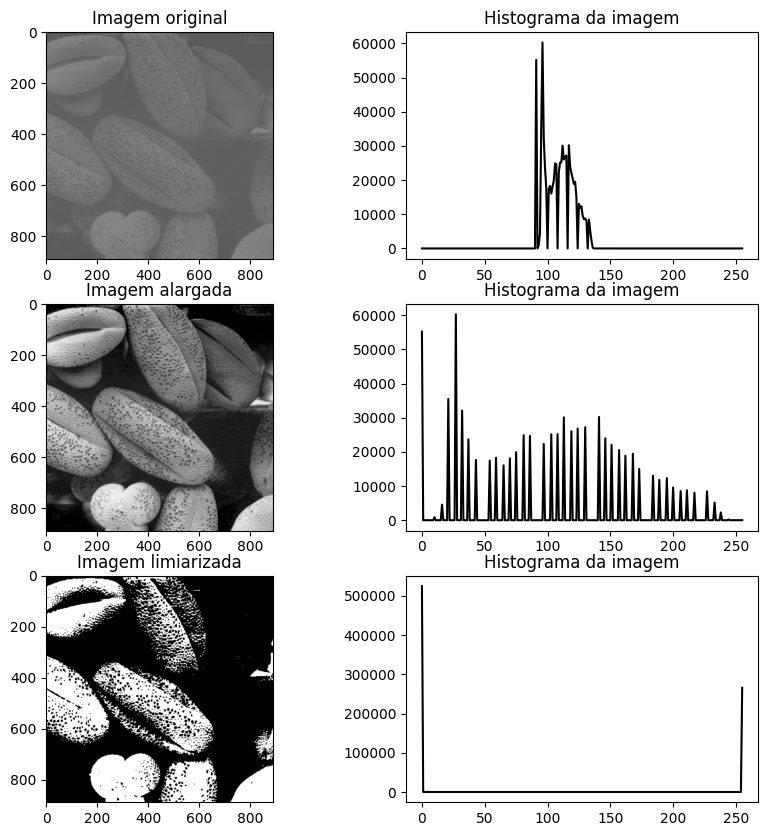

In [ ]:
f,ax = plt.subplots(3,2,figsize=(10,10))

ax[0][0].set_title('Imagem original')
ax[0][0].imshow(img, vmin=0, vmax=255, cmap='gray')
ax[0][1].set_title('Histograma da imagem')
ax[0][1].plot(hist, color='k')

ax[1][0].set_title('Imagem alargada')
ax[1][0].imshow(norm, vmin=0, vmax=255, cmap='gray')
ax[1][1].set_title('Histograma da imagem')
ax[1][1].plot(hist_norm, color='k')

ax[2][0].set_title('Imagem limiarizada')
ax[2][0].imshow(imagem_limiarizada, vmin=0, vmax=255, cmap='gray')
ax[2][1].set_title('Histograma da imagem')
ax[2][1].plot(hist_limiarizada, color='k')


# Conclusão
- As técnicas aplicadas permitiram uma análise mais eficaz da imagem original, destacando características que antes estavam pouco visíveis.
- O alargamento de contraste se mostrou eficiente para melhorar a percepção visual dos detalhes, tornando a separação entre objetos e fundo mais clara.
- A limiarização simplificou a imagem ao reduzir a quantidade de tons, facilitando a segmentação.
